<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220809_HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hirarchical Clustering을 활용한 데이터 분류 실습**
---
> 계층적 군집화 알고리즘을 활용하여 IRIS 데이터 분류하기

#### **라이브러리 import**


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram       # linkage : 계증적 군집화 알고리즘 dendrogram: 덴드로그램
from scipy.cluster.hierarchy import fcluster                  # 클러스터를 잘라줌
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

####**데이터 로드 및 확인**

In [ ]:
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data = pd.DataFrame(iris.data)
data = pd.concat([data, labels], axis = 1)                    # concat을 통해 데이터와 레이블을 하나의 프레임으로 합침
data.head()

,0,1,2,3,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **클러스터링 수행**


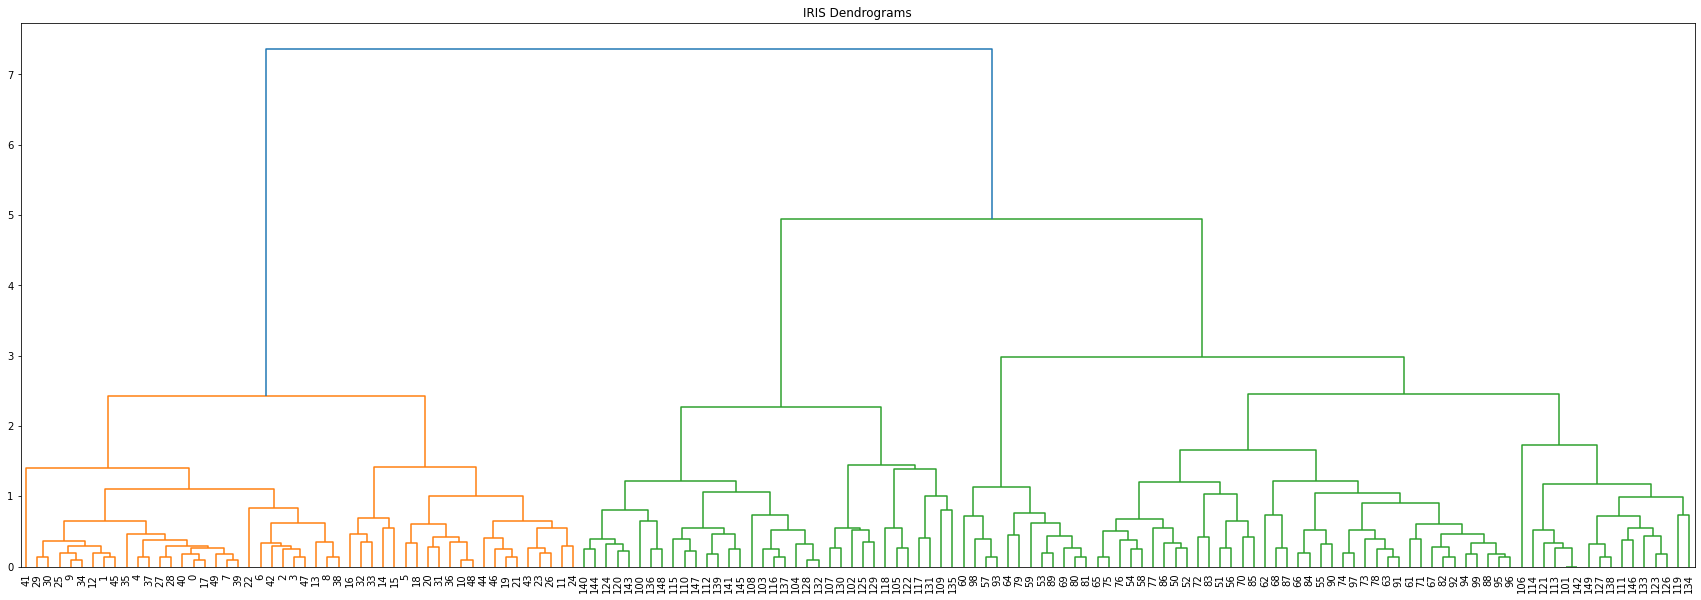

In [ ]:
merge = linkage(data, method = 'complete')                 # 완전결합방식(complete) / single / avarage / ward 등
plt.figure(figsize=(30, 10))
plt.title("IRIS Dendrograms")

dendrogram(merge, leaf_rotation=90, leaf_font_size=10)     # leaf_rotation으로 글꼴을 세로정렬한 셈. 가로로 표현하면 숫자가 잘릴 수 있음
plt.show()

#### **클러스터 자르기**

In [ ]:
cut = fcluster(merge, t=3, criterion='distance')      # 위의 덴드로그램의 y축 3을 기준으로 잘라냄 이 때 클러스터값이 3이 됨
cut

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

### **분류 결과 확인**

In [ ]:
labels = data['labels']
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

In [ ]:
df = pd.DataFrame({'predict': cut, 'labels':labels})
df

,predict,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [ ]:
ct = pd.crosstab(df['predict'], df['labels'])
ct

labels,0,1,2
predict,,,
1,50,0,0
2,0,0,34
3,0,50,16


### 단일 결합 방식으로 재시도

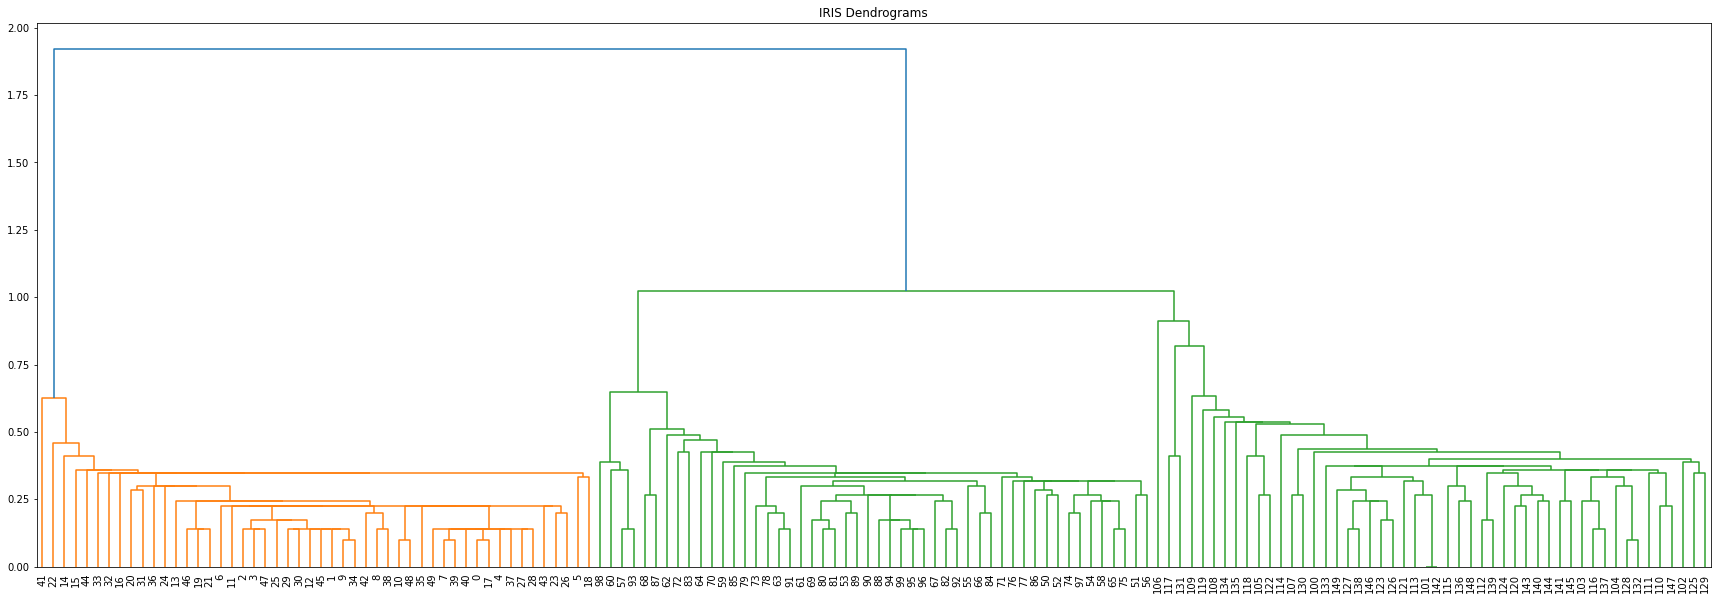

In [ ]:
merge_single = linkage(data, method = 'single')
plt.figure(figsize=(30, 10))
plt.title("IRIS Dendrograms")

dendrogram(merge_single, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [ ]:
cut_single = fcluster(merge_single, t=1.0, criterion='distance')      # 위의 덴드로그램의 y축 3을 기준으로 잘라냄 이 때 클러스터값이 3이 됨
cut_single

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
df_single = pd.DataFrame({'predict': cut_single, 'labels':labels})
ct_single = pd.crosstab(df_single['predict'], df_single['labels'])
ct_single

labels,0,1,2
predict,,,
1,50,0,0
2,0,50,0
3,0,0,50
